In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
import tensorflow as tf 
from sklearn.datasets import make_blobs
import matplotlib

matplotlib.rcParams['axes.unicode_minus'] = False
x1 = np.random.normal(3, 0.5, [500, 2])
x2 = np.random.normal(1, 0.5, [500, 2])
x = np.concatenate([x1, x2], 0) 
d = np.ones([1000, 1])
d[:500, 0] = -1 

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


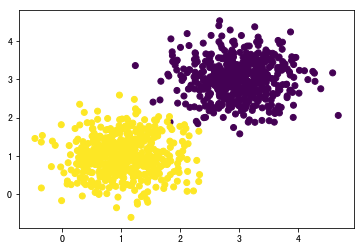

In [2]:
plt.scatter(x[:,0],x[:,1],c=d.reshape(1000,))

In [3]:
tf.reset_default_graph()
inputs = tf.placeholder(tf.float32, [None, 2])
target = tf.placeholder(tf.float32, [None, 1])

w = tf.get_variable("w", [2, 1])
b = tf.get_variable("b", [1])
# 线性模型
y = tf.matmul(inputs, w) + b

# loss = tf.reduce_mean((y-target)**2)

loss1 = tf.reduce_sum(w**2) 
# hinge_loss
loss2 = tf.nn.relu(10-target*y)
loss = tf.reduce_sum(loss2) + 1e-2*loss1

step = tf.train.AdamOptimizer().minimize(loss)

sess = tf.Session() 
sess.run(tf.global_variables_initializer()) 

for itr in range(600000):
    idx = np.random.randint(0, 1000, [30])
    inx = x[idx]
    ind = d[idx]
    _, ls, ww, bb = sess.run([step, loss, w, b], feed_dict={inputs:inx, target:ind})
    if itr%1000==0:
        print(itr,ls)
ls2, ww, bb = sess.run([loss2, w, b], feed_dict={inputs:x, target:d})
print(ww, bb)

0 304.24127
1000 217.48793
2000 211.87692
3000 166.88313
4000 136.85666
5000 106.136765
6000 139.38036
7000 173.89438
8000 88.64482
9000 176.53563
10000 145.12358
11000 109.846756
12000 154.86983
13000 130.34987
14000 119.13345
15000 62.312252
16000 115.04822
17000 40.739353
18000 70.65541
19000 73.034424
20000 74.71682
21000 67.005615
22000 38.74793
23000 34.853786
24000 27.98924
25000 54.008945
26000 26.84811
27000 40.16374
28000 35.46839
29000 44.483154
30000 21.351122
31000 31.024382
32000 57.82523
33000 36.949345
34000 26.625385
35000 26.144526
36000 35.25141
37000 4.576822
38000 23.68204
39000 13.756589
40000 32.2923
41000 9.659315
42000 18.795095
43000 24.110676
44000 19.788237
45000 17.031008
46000 24.64519
47000 14.624197
48000 38.838093
49000 4.2770667
50000 18.665304
51000 18.46652
52000 8.320687
53000 16.734848
54000 48.569195
55000 12.401781
56000 11.873705
57000 12.323992
58000 11.5262985
59000 12.227056
60000 10.071989
61000 8.080397
62000 13.64463
63000 19.4444
64000 8.

499000 16.478819
500000 5.436653
501000 4.445405
502000 3.7146955
503000 6.764447
504000 22.77011
505000 3.7118793
506000 10.488586
507000 12.321587
508000 10.90761
509000 18.693735
510000 4.537054
511000 3.7108867
512000 10.146952
513000 13.241593
514000 3.74423
515000 4.512452
516000 3.7691522
517000 3.7477553
518000 3.7322247
519000 6.1559258
520000 10.392211
521000 13.467077
522000 6.2111187
523000 9.345983
524000 13.602079
525000 3.753522
526000 3.7605758
527000 25.820238
528000 3.7296643
529000 3.745967
530000 12.14696
531000 6.0334992
532000 3.742873
533000 3.9187558
534000 20.667397
535000 3.7520757
536000 18.252579
537000 3.7404191
538000 19.424517
539000 3.7760353
540000 4.97278
541000 3.736347
542000 6.9264364
543000 6.501005
544000 3.754095
545000 17.25324
546000 3.746914
547000 10.581332
548000 6.1965933
549000 16.846113
550000 12.063641
551000 13.259772
552000 5.940943
553000 25.92526
554000 3.751992
555000 4.8991947
556000 13.377497
557000 5.156823
558000 3.770648
559000

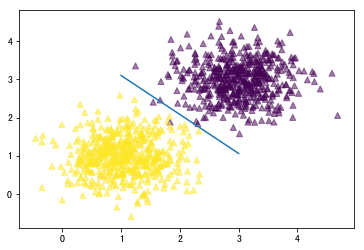

In [8]:
xx1 = np.linspace(1, 3, 20)
xx2 = (-bb-ww[0]*xx1)/ww[1]
plt.plot(xx1,xx2)
plt.scatter(x[:, 0], x[:, 1], marker='^', c=d[:, 0], alpha=0.5)

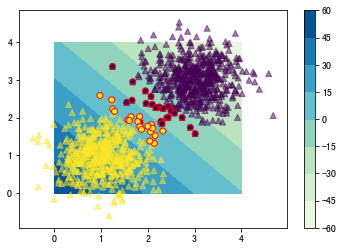

In [9]:
xx = np.linspace(0,4,20) 
yy = np.linspace(0,4,20) 
xx, yy = np.meshgrid(xx, yy) 
inxy = np.concatenate([np.reshape(xx, [-1, 1]), np.reshape(yy, [-1, 1])], 1)
dd = sess.run([y], feed_dict={inputs:inxy})
ls2 = np.reshape(ls2, [-1])
dd = np.reshape(dd, [20, 20]) 
fig, ax = plt.subplots()
cs = ax.contourf(xx, yy, dd,cmap='GnBu')
ax.scatter(x[:, 0], x[:, 1], marker='^', c=d[:, 0], alpha=0.5)
#plt.scatter(x[ls2>0.1, :][:, 0], x[ls2>0.1,:][:, 1], c=d[ls2>0.1,:][:, 0])
error = 0.1
ax.scatter(x[ls2>error, 0], x[ls2>error,1], c=d[ls2>error,0],edgecolors='r')
cbar = fig.colorbar(cs)
plt.show()